<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/ml_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning fundamentals
One fundamental issue in machine learning is overfitting. One has to find the best trade-off between training a model, using the data available, that should also work well with unseen data. the trade-off is between optimization and generalization. The usual behavior while training a model is that the model improves, that is the validation error decreases, till a minimum after a certain number of epochs and after that the error starts to increase again. One source of overfitting is noisy training data, when in the training set there are examples that are outliers or that are mislabeled. We can see what happens when we add white noise images or black images to the MNIST dataset, a set of 60k 28x28 pixels images of digits from 0 to 9.

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), _ = mnist.load_data()
train_images.shape

(60000, 28, 28)

We reshape and normalize the MNIST data

In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

We create two new datasets by adding an equal number of white noise and black images to the MNIST dataset

In [3]:
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

We create a model of with single layer of 512 units and an output softmax layer to classify the images among 10 classes

In [6]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Now we use the model to create two instances using the noisy and the black datasets

In [10]:
model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 14s 36ms/step - loss: 0.6294 - accuracy: 0.8119 - val_loss: 0.2883 - val_accuracy: 0.9126
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.2617 - accuracy: 0.9184 - val_loss: 0.2341 - val_accuracy: 0.9238
Epoch 3/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1714 - accuracy: 0.9473 - val_loss: 0.1784 - val_accuracy: 0.9461
Epoch 4/10
375/375 [==============================] - 9s 25ms/step - loss: 0.1232 - accuracy: 0.9610 - val_loss: 0.1444 - val_accuracy: 0.9564
Epoch 5/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0909 - accuracy: 0.9714 - val_loss: 0.1578 - val_accuracy: 0.9532
Epoch 6/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.1238 - val_accuracy: 0.9629
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.1429 - val_accuracy: 0.960

In [11]:
model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2995 - accuracy: 0.9140 - val_loss: 0.1482 - val_accuracy: 0.9578
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1260 - accuracy: 0.9627 - val_loss: 0.1096 - val_accuracy: 0.9670
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0833 - accuracy: 0.9753 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0451 - accuracy: 0.9865 - val_loss: 0.0840 - val_accuracy: 0.9761
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0784 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0742 - val_accuracy: 0.978

We plot the validation accuracy for the two datasets. We can see that adding noise to the training data reduces the accuracy of the model. Noisy data lead to overfitting because the model learns non informative or misleading information. One way to reduce the problem is feature selection, that is removing outliers or ambiguous information from the training data. When the data is noisy the model will end up memorizing the training data and reducing its ability to generalize with unseen data. In this situation the model is overfitting.    

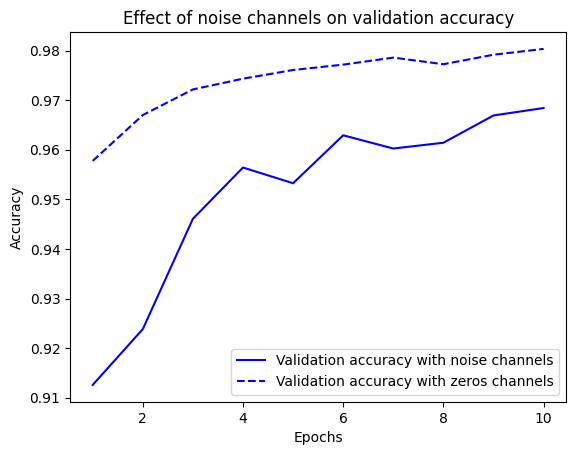

In [13]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()